# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
count = mouse_study_complete[["Mouse ID"]].nunique()
print(count)

Mouse ID    249
dtype: int64


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplic1 = mouse_study_complete[mouse_study_complete.duplicated(["Mouse ID", "Timepoint"])]
print(duplic1['Mouse ID'].unique())

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# Get list Of duplicate rows using multiple columns

duplic2 = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == "g989"]
# https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplic2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_complete2 = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] != "g989"]
mouse_study_complete2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
count = mouse_study_complete2[["Mouse ID"]].nunique()
print(count)

Mouse ID    248
dtype: int64


In [8]:
# checking types
mouse_study_complete2.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Create reuced dataframe with just drug regimen and tumor volume
mouse_study_stats = mouse_study_complete2.loc[:,["Drug Regimen","Tumor Volume (mm3)"]] 
mouse_study_stats = mouse_study_stats.set_index(list(mouse_study_stats)[0])

#stats
mean = mouse_study_stats.groupby(["Drug Regimen"]).mean()
mean= mean.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})

median = mouse_study_stats.groupby(["Drug Regimen"]).median()
median = median.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})

variance = mouse_study_stats.groupby(["Drug Regimen"]).var()
variance = variance.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})

stdev = mouse_study_stats.groupby(["Drug Regimen"]).var()
stdev = stdev.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Dev."})

SEM = mouse_study_stats.groupby(["Drug Regimen"]).sem()
SEM = SEM.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Err."})

# Merging mini-dataframes
mouse_study_stats_sum = pd.merge(mean, median, how = "left", on = ["Drug Regimen"])
mouse_study_stats_sum = pd.merge(mouse_study_stats_sum, variance, how = "left", on = ["Drug Regimen"])
mouse_study_stats_sum = pd.merge(mouse_study_stats_sum, stdev, how = "left", on = ["Drug Regimen"])
mouse_study_stats_sum = pd.merge(mouse_study_stats_sum, SEM, how = "left", on = ["Drug Regimen"])

mouse_study_stats_sum

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,59.450562,0.573111


In [10]:
mouse_study_stats

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,45.000000
Ketapril,45.000000
Ketapril,45.000000
Ketapril,45.000000
Ketapril,45.000000
...,...
Capomulin,41.581521
Capomulin,31.023923
Ceftamin,61.433892


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

#messed around with this a bit but so far no go 5/30

## Bar and Pie Charts

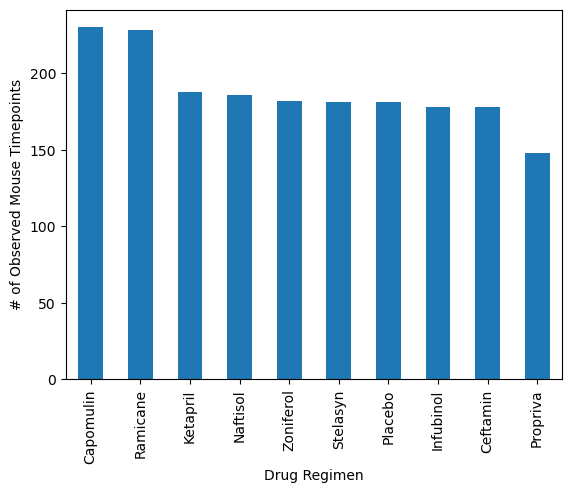

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# count the number of rows for each drug regimen and put into a dataframe
drug_timept = pd.DataFrame(mouse_study_complete2["Drug Regimen"].value_counts())
drug_timept.rename(columns={"Drug Regimen": "# of Timepoints"}, inplace = True)
drug_timept.index.name = "Drug Regimen"

# Use DataFrame.plot() in order to create a bar chart of the data
drug_timept.plot(kind="bar", width= 0.5, legend=False)
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

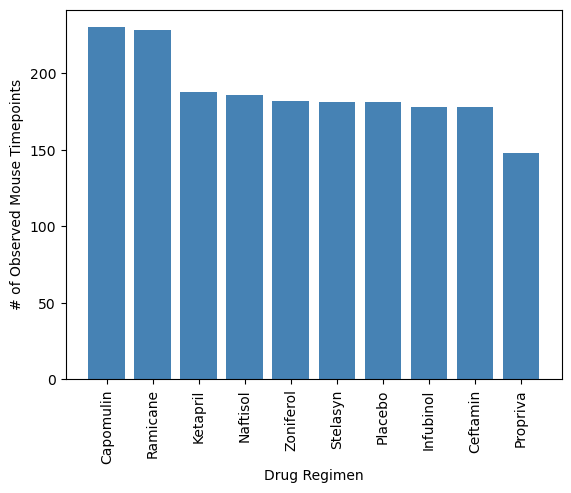

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the number of rows for each drug regimen and put into a dataframe
drug_timept2 = pd.DataFrame(mouse_study_complete2["Drug Regimen"].value_counts())
drug_timept2.rename(columns={"Drug Regimen": "# of Timepoints"}, inplace = True)
drug_timept2.index.name = "Drug Regimen"

# Set x axis and tick locations
x_axis = np.arange(len(drug_timept2.index))
tick_locations = [value for value in x_axis]

# Create plot
plt.bar(x_axis, drug_timept2["# of Timepoints"], color='steelblue', alpha=1, align="center")
plt.xticks(tick_locations, drug_timept2.index, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


array([<Axes: ylabel='Sex'>], dtype=object)

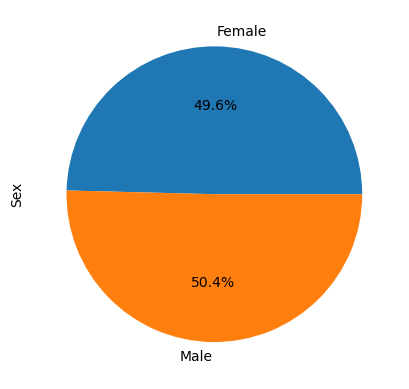

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Filter the DataFrame down only to those columns to chart and rename columns
sex_df = mouse_study_complete2[["Mouse ID","Sex"]]

# Remove redundant Mouse ID
sex_df = sex_df.drop_duplicates(subset=["Mouse ID"])

# Count the number of males vs. females
sex_df2 = sex_df.groupby("Sex").count()

# Renaming headers in df
sex_df2.index.name = None
sex_df2.rename(columns={"Mouse ID": "Sex"}, inplace = True)

# Create plot
sex_df2.plot(kind='pie', subplots=True, autopct='%1.1f%%', legend = False)

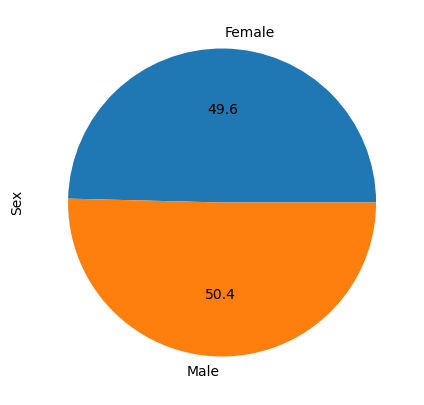

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

def my_autopct(pct):
    return ('%.1f' % pct)

plot = sex_df2.plot.pie(y='Sex', autopct=my_autopct, figsize=(5, 5))
plot.get_legend().remove()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# # Reduce the original summary df mouse_study_complete2 to only include the drugs of interest and Mouse ID,
# # Timepoint, Tumor Volume (mm3), and Drug Regimen columns
# f_tumor_vol = mouse_study_complete2.loc[:,["Mouse ID", "Timepoint", "Tumor Volume (mm3)","Drug Regimen"]]
# # 1880 rows
  
# # Selecting rows based on condition
# options = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# f_tumor_vol = f_tumor_vol[f_tumor_vol["Drug Regimen"].isin(options)]
# # 814 rows
# f_tumor_vol

# unique_id = (f_tumor_vol["Mouse ID"].unique())

# # treatment = []
# # final_vol = {}

# # Start by getting the last (greatest) timepoint for each mouse
# # for option in options
# #     for unique in unique_id
#         if 
        



# f_tumor_vol = f_tumor_vol.groupby(["Timepoint"])
# f_tumor_vol_df = pd.DataFrame(f_tumor_vol)
# f_tumor_vol_df
# mouse_study_stats.groupby(["Drug Regimen"])



['b128' 'c326' 'c139' 'v339' 'a577' 'y163' 'k483' 'k804' 'o809' 'z581'
 'a251' 'i386' 'q132' 'c458' 'q610' 'j913' 'a411' 'a444' 'd251' 'j989'
 'y449' 'k403' 'c758' 'r811' 'a644' 'i177' 'g791' 'a520' 'u196' 'm546'
 'w678' 'n364' 's508' 'e662' 'z578' 'r921' 'v719' 'q597' 'c895' 'a203'
 'x822' 'l558' 'l733' 'f436' 'l490' 'b759' 'l471' 'y865' 'y769' 'l661'
 'j296' 'u149' 'u153' 'w151' 'h531' 'a685' 'o813' 'm756' 'n671' 's121'
 'v766' 'w193' 'e476' 'w584' 'b447' 'k210' 'a275' 'x581' 'x226' 'p438'
 'b487' 'o287' 'q483' 't573' 'f345' 'i334' 'j246' 'r554' 's185' 'b742'
 'x401' 'l509' 's710' 'r157' 'u364' 'j119' 'v923' 'w914' 'i738' 'r944'
 'y793' 'g316' 'g288' 'l897' 'w150' 't565' 'i557' 'm957' 'f966' 'm601']


In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# unique_id = (f_tumor_vol["Mouse ID"].unique())
# f_tumor_vol = f_tumor_vol.groupby(["Timepoint"])
f_tumor_volgr =  f_tumor_vol.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
f_tumor_volgr = pd.DataFrame(f_tumor_volgr)
# f_tumor_volgr


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# f_tumor_mrg = pd.merge(f_tumor_volgr, mouse_study_complete2, how="left", on=["Timepoint", "Timepoint"])
f_tumor_mrg = pd.merge(f_tumor_volgr, mouse_study_complete2, on=["Mouse ID", "Timepoint"]).loc[:,["Drug Regimen","Mouse ID","Timepoint","Tumor Volume (mm3)"]] 
f_tumor_mrg

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tvol.append(["Tumor Volume (mm3)"])        
    print(tvol)
    # add subset 
#     HERE!!
    
    # Determine outliers using upper and lower bounds


[['Tumor Volume (mm3)']]
[['Tumor Volume (mm3)'], ['Tumor Volume (mm3)']]
[['Tumor Volume (mm3)'], ['Tumor Volume (mm3)'], ['Tumor Volume (mm3)']]
[['Tumor Volume (mm3)'], ['Tumor Volume (mm3)'], ['Tumor Volume (mm3)'], ['Tumor Volume (mm3)']]


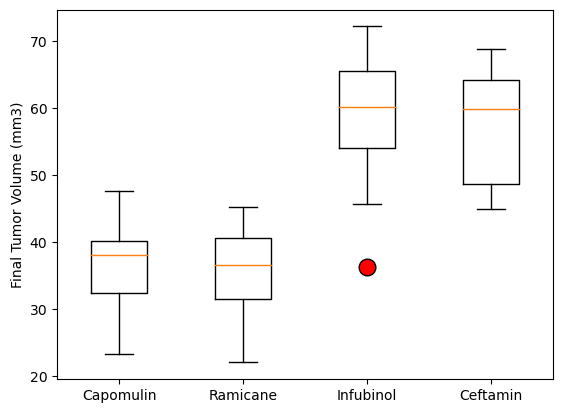

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

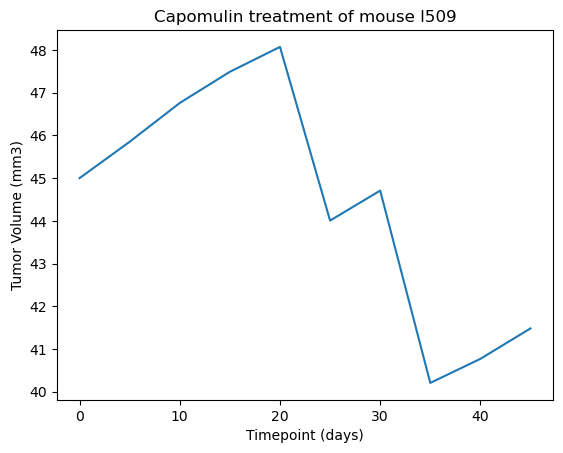

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


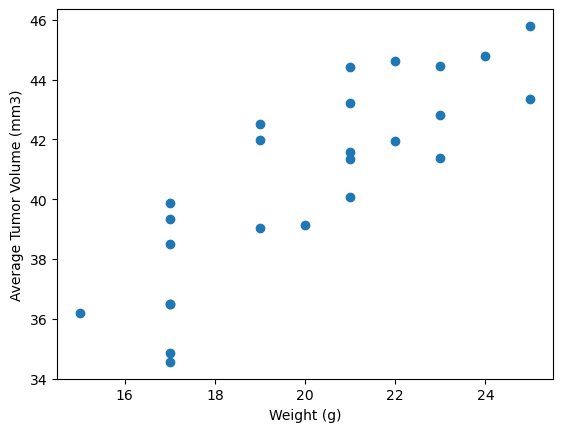

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


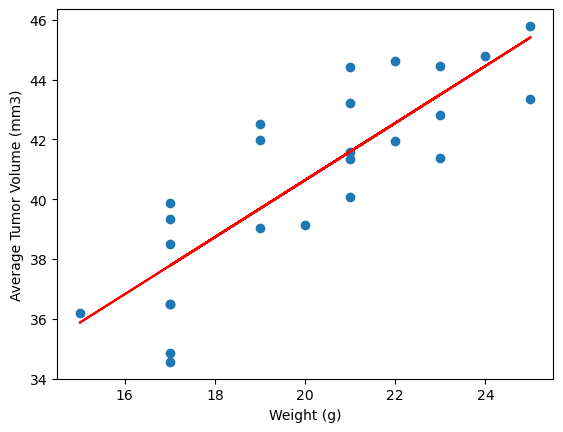

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
